In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression #logistics regression
from sklearn.metrics import accuracy_score,confusion_matrix #evaluation for model
from sklearn.datasets import load_wine

In [8]:
df=load_wine()

sklearn.utils.Bunch

In [15]:
wine=pd.DataFrame(df.data)

In [16]:
df.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [18]:
wine.columns=df.feature_names

In [22]:
wine['target']=df.target
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [23]:
a=wine.drop("target",axis=1)
b=wine.target

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=0)

In [26]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()  
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
y_pred = classifier.predict(xtest)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, y_pred))  
print(classification_report(ytest, y_pred)) 
print(accuracy_score(ytest, y_pred))

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94         8

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [32]:
y_pred = classifier.predict(xtest)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, y_pred))  
print(classification_report(ytest, y_pred)) 
print(accuracy_score(ytest, y_pred))

[[14  1  1]
 [ 0 16  5]
 [ 1  2  5]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.84      0.76      0.80        21
           2       0.45      0.62      0.53         8

   micro avg       0.78      0.78      0.78        45
   macro avg       0.74      0.75      0.74        45
weighted avg       0.81      0.78      0.79        45

0.7777777777777778


In [35]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
pred_dia=lg.predict(xtest)

In [38]:
acc=round(accuracy_score(ytest,pred_dia),3)*100
acc

93.30000000000001

In [39]:
# cross validation
from sklearn.model_selection import cross_val_score
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

#perform 10 fold cross validation
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,xtrain,ytrain,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

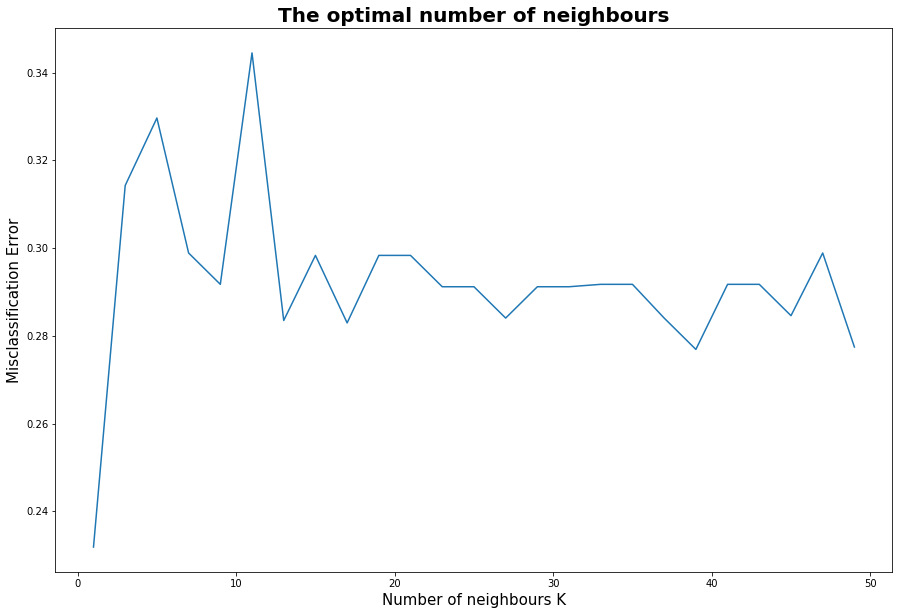

In [40]:
MSE = [1-c for c in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(k_list,MSE)
plt.title('The optimal number of neighbours',fontsize=20,fontweight='bold')
plt.xlabel('Number of neighbours K', fontsize=15)
plt.ylabel('Misclassification Error',fontsize=15)
plt.show()